<a href="https://colab.research.google.com/github/viji514/Complex_emotions/blob/main/ComplexEmotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
data_dir = '/content/drive/MyDrive/complex'  # Path to dataset
classes = ['stress', 'melancholy', 'sarcastic', 'anxiety']  # Emotion categories


In [5]:
img_size = 128

In [6]:
def load_data(data_dir, classes, img_size):
    X, y = [], []
    for label, emotion in enumerate(classes):
        path = os.path.join(data_dir, emotion)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0  # Normalize
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)


In [7]:
X, y = load_data(data_dir, classes, img_size)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 541ms/step - accuracy: 0.2412 - loss: 1.4510 - val_accuracy: 0.5000 - val_loss: 1.2717
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.2867 - loss: 1.5556 - val_accuracy: 0.4000 - val_loss: 1.3632
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - accuracy: 0.5592 - loss: 1.3646 - val_accuracy: 0.5000 - val_loss: 1.3040
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - accuracy: 0.4057 - loss: 1.2521 - val_accuracy: 0.4000 - val_loss: 1.4205
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.4337 - loss: 1.3559 - val_accuracy: 0.3000 - val_loss: 1.3385
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 778ms/step - accuracy: 0.6190 - loss: 1.1575 - val_accuracy: 0.2000 - val_loss: 1.3735
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 732ms/step - accuracy: 0.5488 - loss: 1.0286 - val_accuracy: 0.3000 - val_loss: 1.4197
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.6014 - loss: 0.8795 - val_accuracy: 0.4000 - val_loss:

Text(0.5, 1.0, 'Accuracy over Epochs')

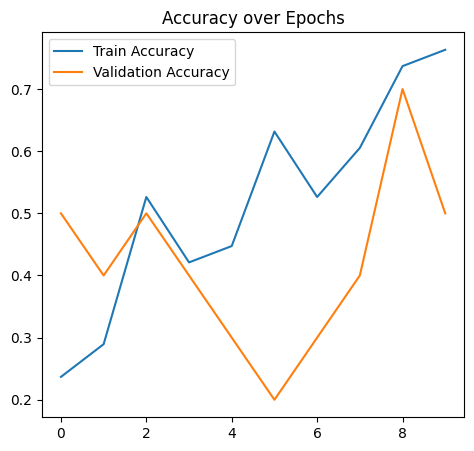

In [12]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')


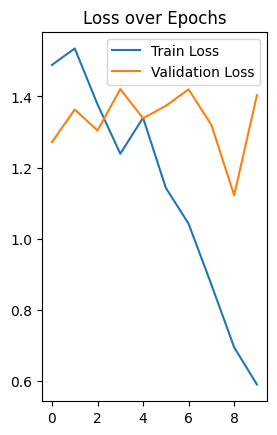

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [24]:
def predict_emotion(img_path, model):
    img = cv2.imread(img_path)
    if img is None:
        return None, None
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return classes[class_index], cv2.imread(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


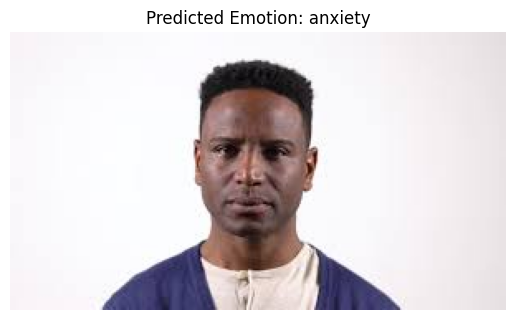

Predicted Emotion: anxiety


In [25]:
img_path = '/content/drive/MyDrive/complexsample/sample1.jpeg'  # Replace with test image path
predicted_emotion, input_img = predict_emotion(img_path, model)

if predicted_emotion and input_img is not None:
    # Display image with prediction
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

    print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


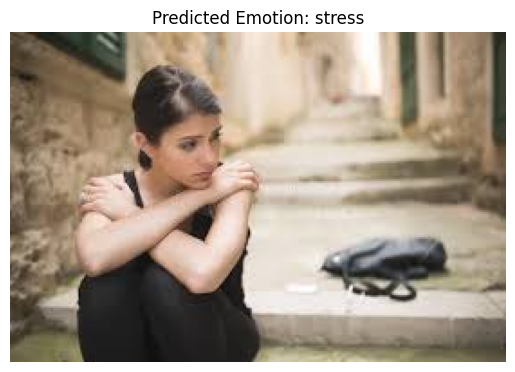

Predicted Emotion: stress


In [26]:
img_path = '/content/drive/MyDrive/complexsample/sample4.jpeg'  # Replace with test image path
predicted_emotion, input_img = predict_emotion(img_path, model)

if predicted_emotion and input_img is not None:
    # Display image with prediction
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

    print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


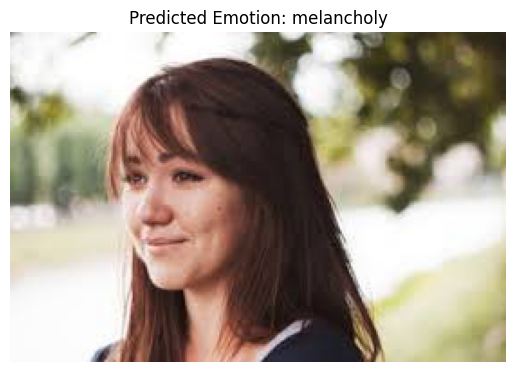

Predicted Emotion: melancholy


In [27]:
img_path = '/content/drive/MyDrive/complexsample/sample2.jpeg'  # Replace with test image path
predicted_emotion, input_img = predict_emotion(img_path, model)

if predicted_emotion and input_img is not None:
    # Display image with prediction
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

    print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


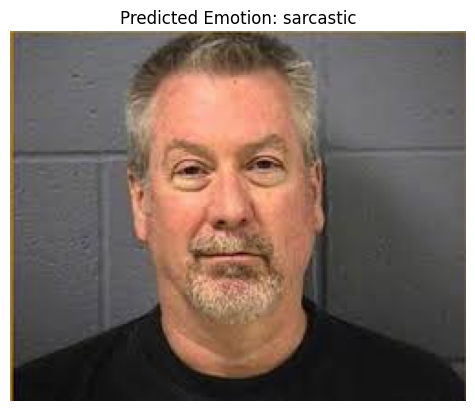

Predicted Emotion: sarcastic


In [28]:
img_path = '/content/drive/MyDrive/complexsample/sample3.jpeg'  # Replace with test image path
predicted_emotion, input_img = predict_emotion(img_path, model)

if predicted_emotion and input_img is not None:
    # Display image with prediction
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

    print(f'Predicted Emotion: {predicted_emotion}')